In [2]:
import numpy as np 
import pandas as pd
import allel
import bokeh
import bokeh.plotting
import malariagen_data
%matplotlib inline
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '/home/sanj/projects/gaardian/workflow/scripts/')
import probetools as probe
%run hapclust.py
bokeh.io.reset_output()

### Load pops

In [3]:
ag3 = malariagen_data.Ag3(pre=True)

In [4]:
cohorts = [
    # Ag1000G phase 3 Ghana sample set in Ag3.0
    "AG1000G-GH",
    # Amenta-Etego sample sets in Ag3.3
    #'1190-VO-GH-AMENGA-ETEGO-VMF00013',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00014',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00028',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00029',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00046',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00047',
    # GAARDIAN sample set in Ag3.4
    #'1244-VO-GH-YAWSON-VMF00149',
    'AG1000G-ML-A',
    'AG1000G-BF-A',
    'AG1000G-BF-B',
    'AG1000G-GN-A',
    'AG1000G-GN-B',
    # GAARD Ghana sample set in Ag3.2
    "1244-VO-GH-YAWSON-VMF00051",
    '1245-VO-CI-CONSTANT-VMF00054',
    '1253-VO-TG-DJOGBENOU-VMF00052',
    '1237-VO-BJ-DJOGBENOU-VMF00050'
]

Which populations do we want to look at?

In [5]:
contig= '2L'
locstart = 28_000_000
locstop = 29_000_000

coeae1f_start = 28_545_396
coeae2f_start = 28_548_433

In [7]:
  
def garuds_h(contig, locstart, locstop, cohort, species, size=1200, step=600, save=False):

    geno = ag3.haplotypes(region=f"{contig}:{locstart}-{locstop}", sample_sets=cohort, analysis='gamb_colu')
    meta = ag3.sample_metadata(sample_sets=cohort)
    
    print("\n")
    print(f"-------------------------------- {cohort} -----------------------------------------")
    print(meta.location.value_counts())
    print(meta.year.value_counts())
    

    sp_ids = meta[meta['aim_species'] == 'gambiae']['sample_id'].to_list()
    geno = geno.query(samples=f"sample_id in {sp_ids}")
    
    haps = allel.GenotypeArray(geno['call_genotype']).to_haplotypes()
    h1, h12, h123, h2_1 = allel.moving_garud_h(haps, size=1000, step=500)
    midpoints = allel.moving_statistic(geno['variant_position'], np.median, size=1000, step=500)    

    assert midpoints.shape == h12.shape, f"arrays not same shape, midpoints shape - {midpoints.shape}, value shape - {values.shape}"
    
    statName = 'H12/H123'
    show=True
    ymin=0
    ymax=0.5
    xmin=locstart
    cohortNoSpaceText = cohort
    cohortText = cohort
    
    if save:
        # store windowed statistics as .tsv 
        df = pd.DataFrame({'midpoint':midpoints, statName:values})
        df.to_csv(f"{prefix}/{statName}_{cohortNoSpaceText}.{contig}.tsv", sep="\t", index=False)

    xtick = np.arange(xmin, midpoints.max(), 100_000)
    ymax = np.max([ymax, h123.max()])
    
    fig, ax = plt.subplots(1,1, figsize=[16,8])
    sns.lineplot(midpoints, h12, color='indianred', linewidth=3, ax=ax)   
    sns.lineplot(midpoints, h123, color="lightcoral", linewidth=1.5, ax=ax)
    #sns.lineplot(midpoints, h2_1, color="grey", linewidth=1, ax=ax)
    plt.vlines(coeae1f_start, 0,ymax, linestyle='dashed', edgecolor='grey')
    plt.vlines(midpoints[np.argmax(h12)], 0,ymax, linestyle='dashed', edgecolor='indianred')
    
    topbar = plt.Rectangle((0,0),1,1,fc="indianred", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], 
                   ['H123', 'H12'],
                   loc='best',# bbox_to_anchor=(1, 0.95),
              ncol=1, fancybox=True, shadow=True, prop={'size':18}, framealpha=0.8)
    l.draw_frame(True)
    
    plt.xlim(xmin, midpoints.max()+1000)
    plt.ylim(ymin, ymax)
    plt.yticks(fontsize=14)
    plt.xticks(xtick, rotation=45, ha='right', fontsize=14)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"{statName} | {cohortText} | {contig}:{locstart}-{locstop}", fontdict={'fontsize':18})
    
    
    if save: plt.savefig(f"{prefix}/{statName}_{cohortNoSpaceText}.{contig}.png",format="png")
    if show: plt.show()



-------------------------------- AG1000G-BF-A -----------------------------------------
Bana              65
Pala              59
Souroukoudinga    57
Name: location, dtype: int64
2012    181
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


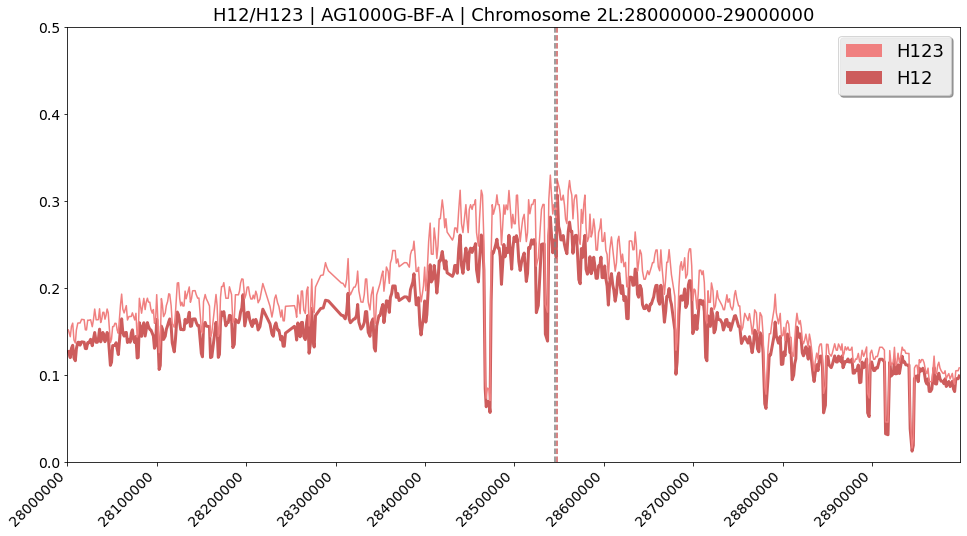



-------------------------------- AG1000G-BF-B -----------------------------------------
Bana              63
Souroukoudinga    21
Pala              18
Name: location, dtype: int64
2014    102
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


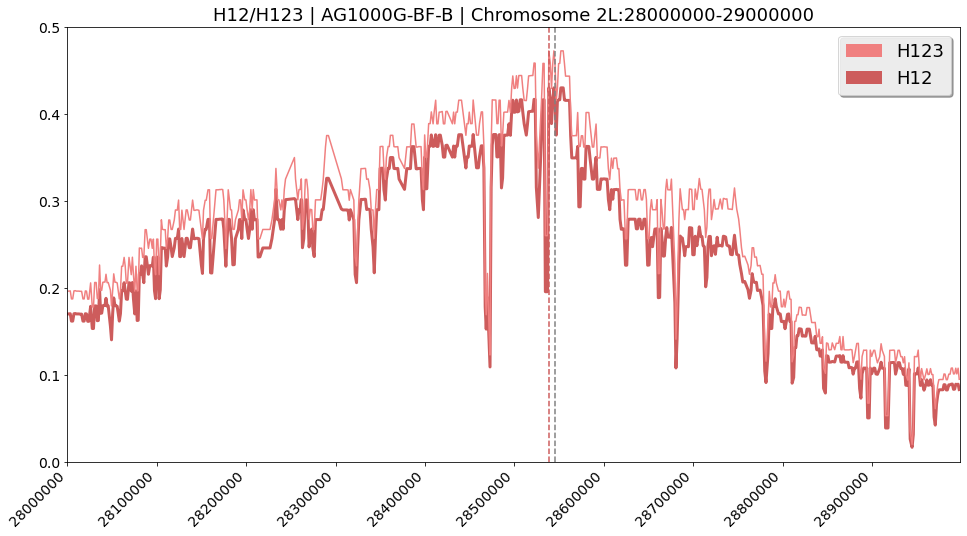



-------------------------------- AG1000G-GN-A -----------------------------------------
Koraboh     23
Koundara    22
Name: location, dtype: int64
2012    45
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


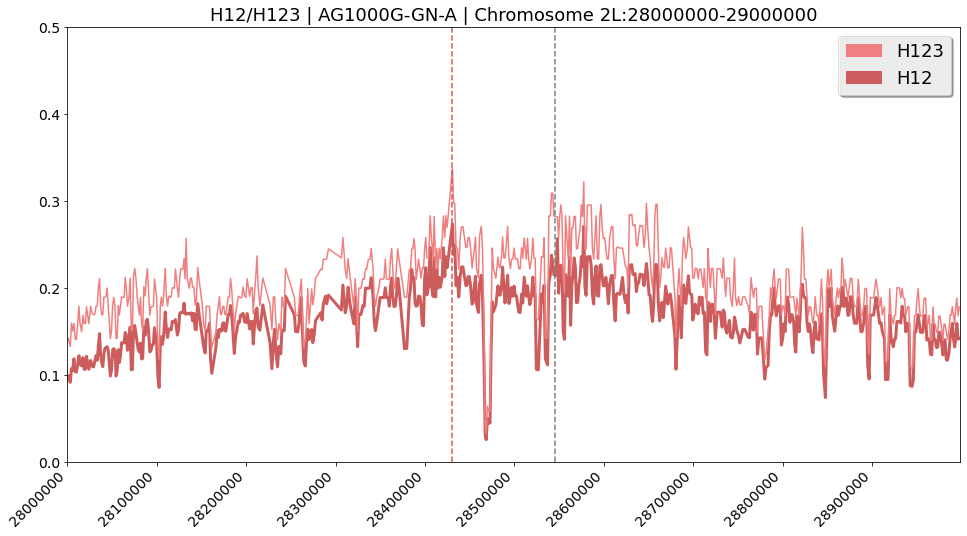



-------------------------------- AG1000G-GH -----------------------------------------
Madina         27
Twifo Praso    25
Takoradi       24
Koforidua      24
Name: location, dtype: int64
2012    100
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


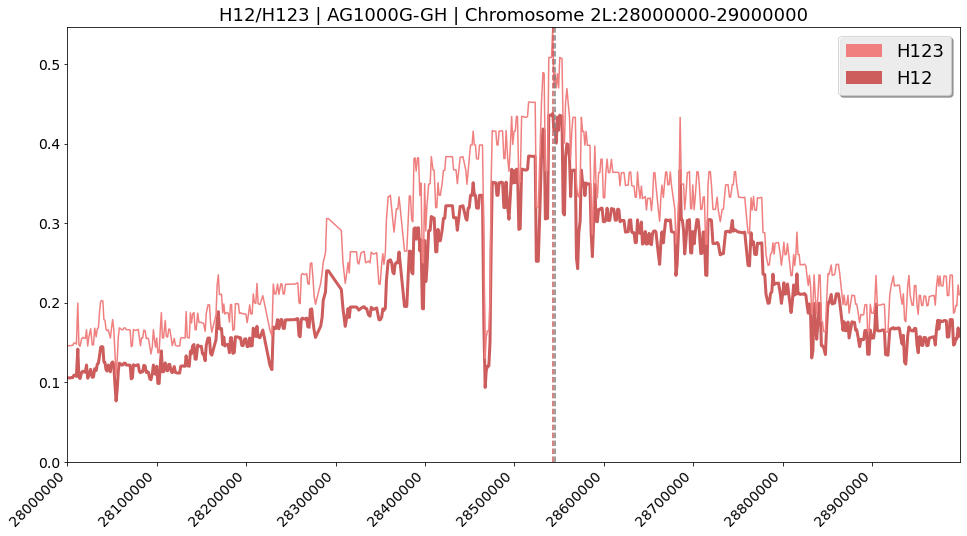



-------------------------------- AG1000G-ML-A -----------------------------------------
Kababougou        40
Ouassorola        13
Tieneguebougou     7
Name: location, dtype: int64
2014    60
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


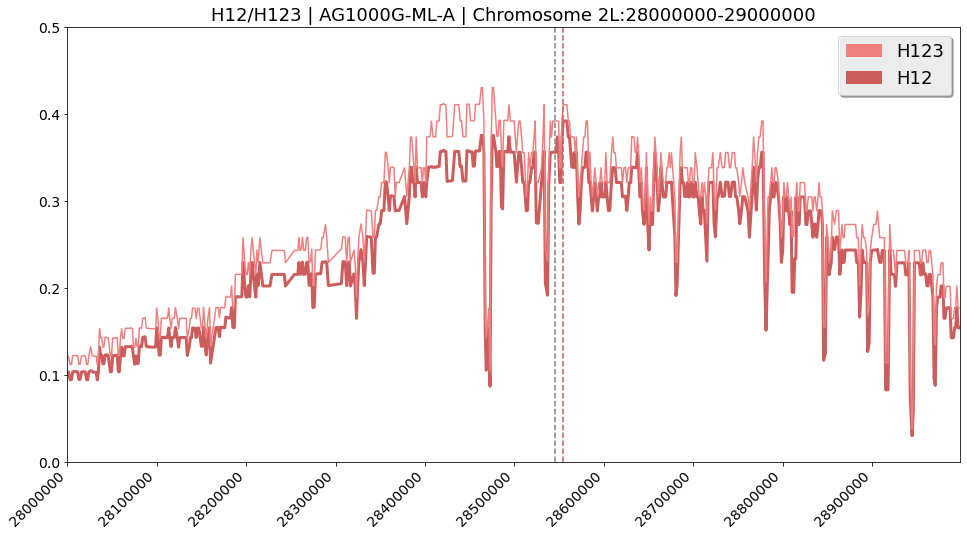



-------------------------------- AG1000G-TZ -----------------------------------------
Muleba    170
Tarime     47
Muheza     43
Moshi      40
Name: location, dtype: int64
2015    170
2012     87
2013     43
Name: year, dtype: int64


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


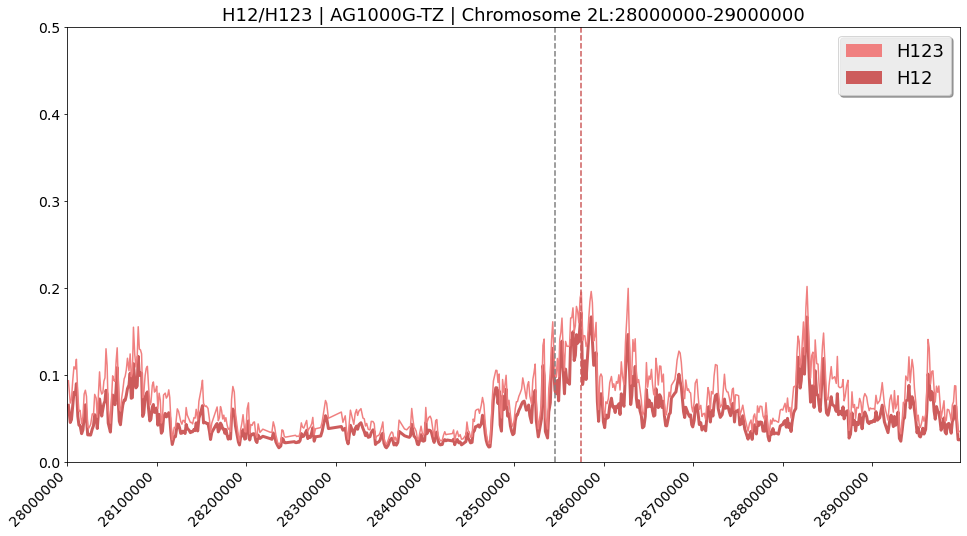

In [119]:
for cohort in cohorts:
    
    garuds_h(contig, locstart, locstop, cohort, species="gambiae", size=1200, step=600)

#### Run across genome and plot H123 together on one plot 

In [11]:
def garuds_h(contig, cohort, size=1200, step=600, save=False):

    snps = ag3.haplotypes(region=contig, sample_sets=cohort, analysis='gamb_colu')
    meta = ag3.sample_metadata(sample_sets=cohort)
    
    print(f"-------------------------------- {cohort} H123 -----------------------------------------")    
    
    sp_ids = snps['sample_id'].compute()
    meta = meta[np.isin(meta['sample_id'], sp_ids.values)]
    sp_bool = meta.eval("aim_species == 'gambiae'")
    snps = snps.isel(samples=sp_bool)

    haps = allel.GenotypeArray(snps['call_genotype'])
    print(haps.shape)
    probe.log("Subsetting to segregating sites")
    seg = haps.count_alleles().is_segregating()
    print(f"There are {seg.sum()} segregating sites")
    haps = haps.compress(seg, axis=0).to_haplotypes()
    probe.log("Running H123...")
    h1, h12, h123, h2_1 = allel.moving_garud_h(haps, size=size, step=step)
    midpoints = allel.moving_statistic(snps['variant_position'].values[seg], np.median, size=size, step=step)   
    assert midpoints.shape == h12.shape, f"arrays not same shape, midpoints shape - {midpoints.shape}, value shape - {h123.shape}"
    
    pd.DataFrame([h123, midpoints]).to_csv(f"../../results/{cohort}.h123.tsv",sep="\t")
    return(h123, midpoints)

In [1]:
cohorts

NameError: name 'cohorts' is not defined

In [12]:
h123_dict = {}
midp_dict = {}

cohorts = np.array(cohorts)

for cohort in cohorts[cohorts != '1237-VO-BJ-DJOGBENOU-VMF00050']:
    
    h123_dict[cohort], midp_dict[cohort] = garuds_h(contig, cohort, size=1200, step=600)

-------------------------------- AG1000G-GH H123 -----------------------------------------
(14810165, 36, 2)
Subsetting to segregating sites
There are 1918269 segregating sites
Running H123...
-------------------------------- AG1000G-ML-A H123 -----------------------------------------
(14810165, 33, 2)
Subsetting to segregating sites
There are 2170585 segregating sites
Running H123...
-------------------------------- AG1000G-BF-A H123 -----------------------------------------
(14810165, 98, 2)
Subsetting to segregating sites
There are 3406817 segregating sites
Running H123...
-------------------------------- AG1000G-BF-B H123 -----------------------------------------
(14810165, 46, 2)
Subsetting to segregating sites
There are 2436009 segregating sites
Running H123...
-------------------------------- AG1000G-GN-A H123 -----------------------------------------
(14810165, 40, 2)
Subsetting to segregating sites
There are 2349067 segregating sites
Running H123...
---------------------------

In [98]:
colours = probe.get_colour_dict(cohorts)

In [99]:
metadata = ag3.sample_metadata(list(cohorts))

In [ ]:
snps = ag3.haplotypes(region=contig, sample_sets=list(cohorts), analysis='gamb_colu')
meta = metadata

sp_ids = snps['sample_id'].compute()
meta = meta[np.isin(meta['sample_id'], sp_ids.values)]
meta.loc[:, 'sample_id'] = pd.Categorical(meta['sample_id'], categories = sp_ids, ordered = True)
meta = meta.sort_values(by='sample_id')

In [172]:
meta = meta[np.isin(meta['sample_id'], sp_ids.values)]
sp_bool = meta.eval("aim_species == 'gambiae'")
meta = meta.query("aim_species == 'gambiae'")
snps = snps.isel(samples=sp_bool)

In [178]:
h123_dict = {}
midp_dict = {}

for country in meta['country'].unique():
    
    country_bool = meta.eval("country == @country")
    snps2 = snps.isel(samples=country_bool)
    haps = allel.GenotypeArray(snps['call_genotype'])
    print(haps.shape)
    probe.log("Subsetting to segregating sites")
    seg = haps.count_alleles().is_segregating()
    print(f"There are {seg.sum()} segregating sites")
    haps = haps.compress(seg, axis=0).to_haplotypes()
    
    h1, h12, h123_dict[country], h2_1 = allel.moving_garud_h(haps, size=size, step=step)
    midp_dict[country] = allel.moving_statistic(snps['variant_position'].values[seg], np.median, size=size, step=step)   
    assert midpoints.shape == h12.shape, f"arrays not same shape, midpoints shape - {midpoints.shape}, value shape - {h123.shape}"

KeyboardInterrupt: 

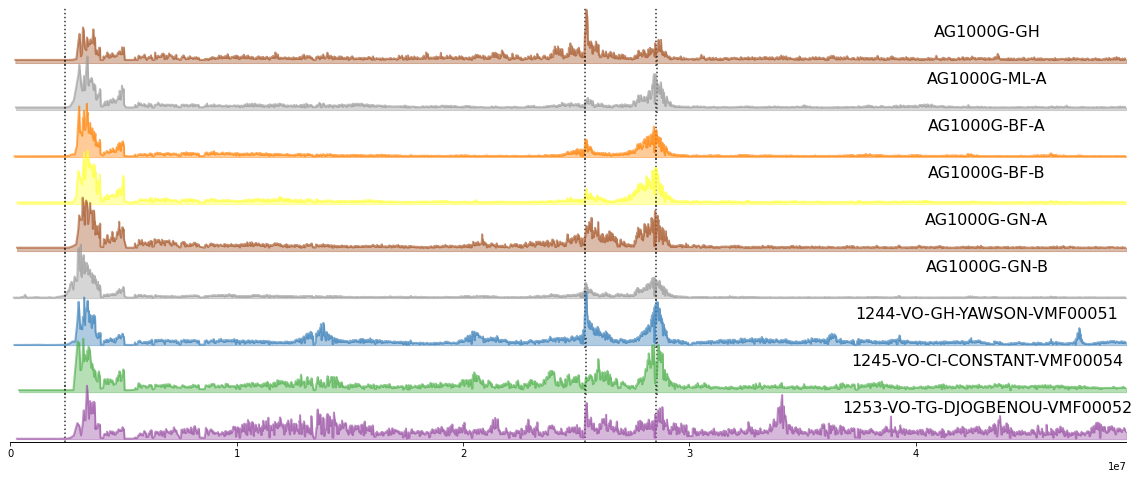

In [202]:
fig, ax = plt.subplots(len(cohorts)-1, 1, figsize=[20,8])

for axes in ax:
    axes.set_facecolor('white')
    # Set transparency of figure
    axes.patch.set_alpha(0)
    axes.set_clip_on(False)

for idx, cohort in enumerate(cohorts[cohorts != '1237-VO-BJ-DJOGBENOU-VMF00050']):
    ax[idx].axvline(2_422_652, linestyle='dotted', clip_on=False, alpha=0.8, color="k", zorder=0)
    ax[idx].axvline(25_400_000, linestyle='dotted', clip_on=False, alpha=0.8, color="k", zorder=0)

    ax[idx].axvline(28_547_000, linestyle='dotted', clip_on=False, alpha=0.8, color="k", zorder=0)
    
    sns.lineplot(ax=ax[idx],x=midp_dict[cohort], y=h123_dict[cohort], linewidth=2, color=colours[cohort], alpha=0.6)
    ax2 = ax[idx].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(cohort, labelpad=-125, rotation=0, fontsize=16)
    ax2.yaxis.set_label_coords(0.875, 0.7)
    ax2.set_yticklabels("")
    ax2.tick_params(axis='y', which='both', right=False)

    ax[idx].set_yticklabels("")
    ax[idx].tick_params(axis='y', which='both', left=False)
    ax[idx].set_xlim(0, max(midp_dict[cohort]))
    if idx == len(cohorts)-2:
        sns.despine(ax=ax[idx], left=True, bottom=False)
        sns.despine(ax=ax2, left=True, bottom=False)
    else:
        sns.despine(ax=ax[idx], left=True, bottom=True)
        sns.despine(ax=ax2, left=True, bottom=True)

        ax[idx].tick_params(axis='x', which='both',       # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
    plt.subplots_adjust(hspace=-0.2)
    
    ax[idx].fill_between(midp_dict[cohort], h123_dict[cohort] , color=colours[cohort], alpha=0.4)